In [24]:
import numpy as np 
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
import gdown
import glob

In [ ]:
file_path = "test.zip"
output = file_path

gdown.download("https://drive.google.com/uc?id=1JPgasvr1db3boCrnuSDRzXCXbbhptQ0h", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1o1aX8fPCUFL8r6B-jsQtsbIUyuLc8Cge", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

gdown.download("https://drive.google.com/uc?id=1agaBydG4SR_HiUisGQBv7k8PkmUTHW61", output)
gdown.extractall(file_path)
if os.path.exists(file_path):
    os.remove(file_path)

In [8]:
db_path = "Face Emotions Images/"
angry = [cv2.imread(file) for file in glob.glob(db_path+"angry/*.*")]
contempt = [cv2.imread(file) for file in glob.glob(db_path+"contempt/*.*")]
disgust = [cv2.imread(file) for file in glob.glob(db_path+"disgust/*.*")]
fear = [cv2.imread(file) for file in glob.glob(db_path+"fear/*.*")]
happy = [cv2.imread(file) for file in glob.glob(db_path+"happy/*.*")]
neutral = [cv2.imread(file) for file in glob.glob(db_path+"neutral/*.*")]
sad = [cv2.imread(file) for file in glob.glob(db_path+"sad/*.*")]
surprise = [cv2.imread(file) for file in glob.glob(db_path+"surprise/*.*")]

In [45]:
from difPy import dif
search = dif(db_path+"angry")

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



DifPy preparing files: [10278/10278] [100%]


KeyboardInterrupt: 

In [36]:
db_path = "Face Emotions Images/"
batch_size = 256
num_classes = 8
img_height = 224
img_width = 224

In [37]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.25,
                                                               subset="training",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(db_path,
                                                               validation_split=0.25,
                                                               subset="validation",
                                                               seed=123456,
                                                               label_mode = 'int',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


Found 73512 files belonging to 8 classes.
Using 55134 files for training.
Found 73512 files belonging to 8 classes.
Using 18378 files for validation.


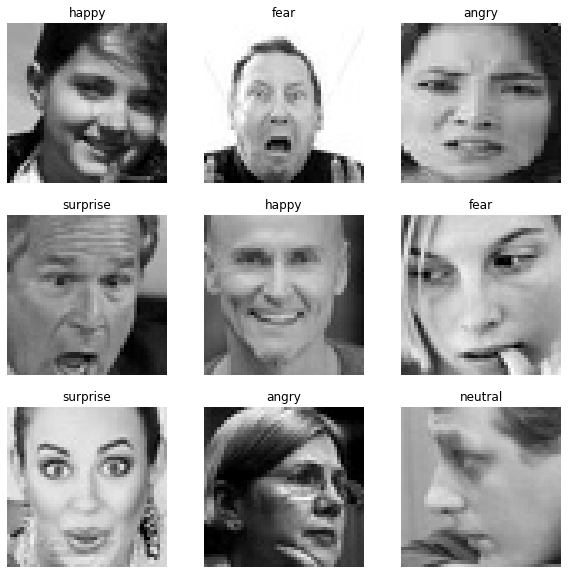

In [28]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [38]:
# Build the Model

model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
                  layers.Conv2D(32, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(128, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(256, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Conv2D(512, 3, padding='same', activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(256, activation='relu'),
                  layers.Dropout(0.2),  
                  layers.Dense(128, activation = 'relu'),
                  layers.Dense(num_classes, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=3,
                                                  mode='min',
                                                  restore_best_weights=True
                                                 )

filepath = 'model_3.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=False,
                                                      mode="min",
                                                      save_freq="epoch",
                                                    )

In [ ]:
epochs = 100
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, batch_size = 256, 
                    verbose = 2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
216/216 - 87s - loss: 1.8373 - accuracy: 0.2471 - val_loss: 1.7119 - val_accuracy: 0.3292
Epoch 2/100
216/216 - 74s - loss: 1.5524 - accuracy: 0.4017 - val_loss: 1.3482 - val_accuracy: 0.4842
Epoch 3/100
216/216 - 86s - loss: 1.3129 - accuracy: 0.5025 - val_loss: 1.1926 - val_accuracy: 0.5485
Epoch 4/100


In [31]:
model1_acc = model.evaluate(val_ds)[1]
model1_acc

575/575 [==============================] - ETA: 12:11 - loss: 0.6001 - accuracy: 0.906 - ETA: 17s - loss: 0.6842 - accuracy: 0.8021  - ETA: 16s - loss: 0.6425 - accuracy: 0.825 - ETA: 14s - loss: 0.6680 - accuracy: 0.820 - ETA: 14s - loss: 0.7332 - accuracy: 0.815 - ETA: 14s - loss: 0.7287 - accuracy: 0.810 - ETA: 15s - loss: 0.7154 - accuracy: 0.810 - ETA: 13s - loss: 0.7035 - accuracy: 0.812 - ETA: 10s - loss: 0.6739 - accuracy: 0.822 - ETA: 8s - loss: 0.6501 - accuracy: 0.818 - ETA: 7s - loss: 0.6498 - accuracy: 0.81 - ETA: 6s - loss: 0.6520 - accuracy: 0.81 - ETA: 6s - loss: 0.6516 - accuracy: 0.81 - ETA: 5s - loss: 0.6225 - accuracy: 0.81 - ETA: 5s - loss: 0.6284 - accuracy: 0.81 - ETA: 5s - loss: 0.6270 - accuracy: 0.81 - ETA: 4s - loss: 0.6194 - accuracy: 0.81 - ETA: 4s - loss: 0.6078 - accuracy: 0.81 - ETA: 4s - loss: 0.6104 - accuracy: 0.81 - ETA: 4s - loss: 0.6043 - accuracy: 0.81 - ETA: 4s - loss: 0.6104 - accuracy: 0.81 - ETA: 3s - loss: 0.6189 - accuracy: 0.81 - ETA: 3s - 

0.8118946552276611